In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [27]:
x = np.arange(0,270,10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))
df = pd.DataFrame({'x':x,'y':y})
df.head(4)

,x,y
0,0,0.883687
1,10,1.064956
2,20,0.916775
3,30,0.603845


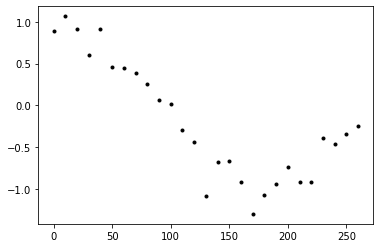

In [28]:
plt.plot(df['x'],df['y'],'k.')


In [7]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

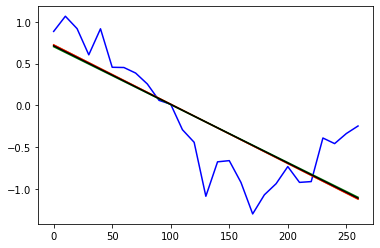

In [29]:
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(df[['x']],df['y'])
modelB.fit(df[['x']],df['y'])
modelC.fit(df[['x']],df['y'])
modelD.fit(df[['x']],df['y'])

df["y'A"] = modelA.predict(df[['x']])
df["y'B"] = modelB.predict(df[['x']])
df["y'C"] = modelC.predict(df[['x']])
df["y'D"] = modelD.predict(df[['x']])

plt.plot(df['x'],df['y'],'b-')
plt.plot(df['x'],df["y'A"],'y-')
plt.plot(df['x'],df["y'B"],'r-')
plt.plot(df['x'],df["y'C"],'g-')
plt.plot(df['x'],df["y'D"],'k-')


## Polynomial Regression

In [30]:
for i in range(2,21):
    df[f'x{i}'] = df['x'] ** i
df.head()

,x,y,y'A,y'B,y'C,y'D,x2,x3,x4,x5,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0,0.883687,0.722332,0.722326,0.700903,0.711542,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,1.064956,0.651464,0.651459,0.631684,0.641505,100,1000,10000,100000,...,1215752192,-727379968,1316134912,276447232,-1530494976,1874919424,1569325056,-1486618624,-1981284352,1661992960
2,20,0.916775,0.580597,0.580592,0.562465,0.571468,400,8000,160000,3200000,...,-1220542464,1358954496,1409286144,-1879048192,1073741824,0,0,0,0,0
3,30,0.603845,0.509730,0.509725,0.493246,0.501430,900,27000,810000,24300000,...,13465600,403968000,-765861888,-1501020160,-2080931840,1996554240,-232914944,1602486272,829947904,-871366656
4,40,0.915111,0.438862,0.438858,0.424027,0.431393,1600,64000,2560000,102400000,...,0,0,0,0,0,0,0,0,0,0


In [33]:
model = LinearRegression()
xn = ['x']
# xn.extend(['x%d' %i for i in range(2,6)])


for i in range(2,6):
    xn.append(f'x{i}')
    model.fit(df[xn],df['y'])
    df[f"y'E{i}"] = model.predict(df[xn])
df.head()

,x,y,y'A,y'B,y'C,y'D,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,y',y'E2,y'E3,y'E4,y'E5
0,0,0.883687,0.722332,0.722326,0.700903,0.711542,0,0,0,0,...,0,0,0,0,0,1.000069,1.405049,0.997577,1.000058,1.000069
1,10,1.064956,0.651464,0.651459,0.631684,0.641505,100,1000,10000,100000,...,1874919424,1569325056,-1486618624,-1981284352,1661992960,0.956533,1.176631,0.957224,0.957266,0.956533
2,20,0.916775,0.580597,0.580592,0.562465,0.571468,400,8000,160000,3200000,...,0,0,0,0,0,0.889079,0.960818,0.891861,0.890333,0.889079
3,30,0.603845,0.509730,0.509725,0.493246,0.501430,900,27000,810000,24300000,...,1996554240,-232914944,1602486272,829947904,-871366656,0.800813,0.757608,0.804624,0.802292,0.800813
4,40,0.915111,0.438862,0.438858,0.424027,0.431393,1600,64000,2560000,102400000,...,0,0,0,0,0,0.694982,0.567003,0.698648,0.696167,0.694982


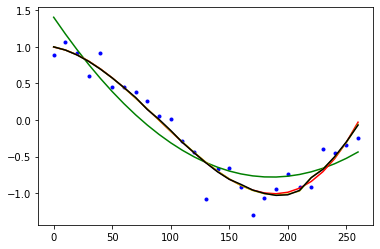

In [35]:
plt.plot(df['x'],df['y'],'b.')
plt.plot(df['x'],df["y'E2"],'g-')
plt.plot(df['x'],df["y'E3"],'r-')
plt.plot(df['x'],df["y'E4"],'y-')
plt.plot(df['x'],df["y'E5"],'k-')

### Polynomial Features

In [39]:
from sklearn.preprocessing import PolynomialFeatures

a = [2]
apoli = PolynomialFeatures(5, include_bias=False) #=> biar pangkat 0 ga masup
# apoli.fit([a])
# apoli.transform([a])
apoli.fit_transform([a])

array([[ 2.,  4.,  8., 16., 32.]])

In [41]:
b = [3,6,9]
# pangkat 1 -10
bpoli = PolynomialFeatures(10,include_bias=False)
bp = bpoli.fit_transform(np.array(b).reshape(-1,1))
bp.astype(int)

array([[          3,           9,          27,          81,         243,
                729,        2187,        6561,       19683,       59049],
       [          6,          36,         216,        1296,        7776,
              46656,      279936,     1679616,    10077696,    60466176],
       [          9,          81,         729,        6561,       59049,
             531441,     4782969,    43046721,   387420489, -2147483648]])

In [45]:
df2 = pd.DataFrame({'c':np.arange(1,11)})
# df2
a = PolynomialFeatures(10, include_bias=False)
cp = a.fit_transform(df2[['c']])
dfcp = pd.DataFrame(cp)
pd.concat([df2,dfcp],axis=1)

,c,0,1,2,3,4,5,6,7,8,9
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00
1,2,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03
2,3,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04
3,4,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,2.621440e+05,1.048576e+06
4,5,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1.953125e+06,9.765625e+06
5,6,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,1.007770e+07,6.046618e+07
6,7,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08
7,8,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,1.342177e+08,1.073742e+09
8,9,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09
9,10,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10


### Pipeline

In [50]:
from sklearn.preprocessing import StandardScaler , Binarizer
from sklearn.pipeline import make_pipeline

data = np.arange(1000,11000,1000)
pipe = make_pipeline(StandardScaler(),Binarizer(threshold=-0.525))
# data
pipe.fit_transform(data.reshape(-1,1))

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [51]:
x = np.arange(0,270,10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))
df3 = pd.DataFrame({'x':x,'y':y})


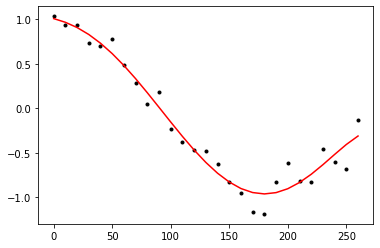

In [55]:
# pipeline => polynomial => linear regression
polyReg = make_pipeline(PolynomialFeatures(5,include_bias=False),LinearRegression())

#train 
polyReg.fit(df3[['x']],df3['y'])
#predict
df3["y'2"] = polyReg.predict(df3[['x']])
# df3.head()

plt.plot(df3['x'],df3['y'],'k.')
plt.plot(df3['x'],df3["y'2"],'r-')